### Exploring Sentiment Classification using TF-IDF Vectorization and Machine Learning Models
#### Large Movie Reviews Data used for analysis comes from http://ai.stanford.edu/~amaas/data/sentiment/



By: Fawad Kirmani

Last Edited On: 11/10/2020

In [1]:
import pandas as pd
import glob
import os
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

#### Location of the input file

In [3]:
pos_train_file = "./aclImdb_v1/aclImdb/train/pos/"
neg_train_file = "./aclImdb_v1/aclImdb/train/neg/"
pos_test_file = "./aclImdb_v1/aclImdb/test/pos/"
neg_test_file = "./aclImdb_v1/aclImdb/test/neg/"

In [4]:
input_files = [pos_train_file, neg_train_file, pos_test_file, neg_test_file]

#### Importing data

In [5]:
def import_data(filename):
    file_list = glob.glob(os.path.join(os.getcwd(), filename, "*.txt"))

    input_data = []

    for file_path in file_list:
        with open(file_path) as f_input:
            input_data.append(f_input.read())
    return input_data

In [6]:
def overall_data(input_files):
    data = pd.DataFrame()
    for i in range(len(input_files)):
        df = pd.DataFrame(import_data(filename=input_files[i]), columns = ["reviews"])
        if input_files[i].find("/pos") > 0:
            df["label"] = 1
        else:
            df["label"] = 0
        if input_files[i].find("/train") > 0:
            df["data_type"] = "train"
        else:
            df["data_type"] = "test"
        data = data.append(df)
    data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    data.dropna(axis=0,inplace=True)
    return data

In [7]:
data = overall_data(input_files=input_files)

In [8]:
data.head()

,reviews,label,data_type
0,This is one of the best films we watched in my...,1,train
1,Spoiler This movie is about such a concept. Wi...,1,train
2,Richard Attenborough is a director whose name ...,1,train
3,"Joan Crawford had just begun her ""working girl...",1,train
4,I have just read the lead comment for this fil...,1,train


In [9]:
# Cleaning the data
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Print statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 12499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    50000 non-null  object
 1   label      50000 non-null  int64 
 2   data_type  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [10]:
# Distribution of positive and negative labels
data["label"].value_counts()

1    25000
0    25000
Name: label, dtype: int64

In [11]:
# Removing empty rows from csv 
data.dropna(axis=0,inplace=True)
nRow, nCol = data.shape
print(f'INFO: There are {nRow} rows and {nCol} columns in the data set.')

INFO: There are 50000 rows and 3 columns in the data set.


In [12]:
# Import for tokenization 
from nltk.tokenize import word_tokenize

In [13]:
# Tokenize
data['title_tokenize'] = data['reviews'].apply(word_tokenize)

data.head()

,reviews,label,data_type,title_tokenize
0,This is one of the best films we watched in my...,1,train,"[This, is, one, of, the, best, films, we, watc..."
1,Spoiler This movie is about such a concept. Wi...,1,train,"[Spoiler, This, movie, is, about, such, a, con..."
2,Richard Attenborough is a director whose name ...,1,train,"[Richard, Attenborough, is, a, director, whose..."
3,"Joan Crawford had just begun her ""working girl...",1,train,"[Joan, Crawford, had, just, begun, her, ``, wo..."
4,I have just read the lead comment for this fil...,1,train,"[I, have, just, read, the, lead, comment, for,..."


In [14]:
targets = data['label'].values

#### TF-IDF Transformer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
# We will consider 1- to 5- gram
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 5))

In [17]:
# fit data to the count vectorizer
data_counts = count_vectorizer.fit_transform(data['reviews'].values)

#fit the ngrams count to the tfidf transformers
data_tfidf = transformer.fit_transform(data_counts)

In [18]:
from sklearn.model_selection import train_test_split

#  The train and test data is divided into 75% to 25% ratio
X_train, X_test, y_train, y_test = train_test_split(data_tfidf, targets, random_state=0)

In [19]:
# Import for prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

#### Random Forest Classification Model

In [20]:
# n_estimators = [550, 600, 650, 700]
# # max_features = [1]
# class_weight = ['balanced']
# criterion = ['gini']
# min_samples_split = [2]
# min_samples_leaf = [60, 70, 80]
# # max_depth = [None]
# # max_leaf_nodes = [3, 7]
# # min_impurity_decrease = [0.0]
# # min_weight_fraction_leaf = [0]
# n_jobs = [-1]
# # oob_score = [True]
# random_state = [88888]
# param_grid = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split,
#                   n_jobs=n_jobs, random_state=random_state, class_weight=class_weight,
#                   min_samples_leaf=min_samples_leaf)

In [21]:
# # # train model
# selection_model = RandomForestClassifier()
# RandomFC = GridSearchCV(estimator=selection_model,
#                       param_grid=dict(param_grid, max_features=[X_train.shape[1]]), 
#                       scoring='recall', cv=3, return_train_score=True)
# RandomFC.fit(X_train, y_train)
# # RandomFC.fit(X_test, y_test)
# print(RandomFC.best_params_)
# RandomFC.cv_results_

In [38]:
# random forest
RandomFC= RandomForestClassifier(n_estimators=650, min_samples_leaf = 60, n_jobs=-1)
RandomFC.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=60, n_estimators=650, n_jobs=-1)

In [57]:
# Print accuracy
print('Accuracy of randomforest classifier on training set: {:.2f}'.format(RandomFC.score(X_train, y_train)))
print('Accuracy of randomforest classifier on test set: {:.2f}'.format(RandomFC.score(X_test, y_test)))
CM = confusion_matrix(y_test, RandomFC.predict(X_test))
print(CM)
CR = classification_report(y_test, RandomFC.predict(X_test))
print(CR)

Accuracy of randomforest classifier on training set: 0.86
Accuracy of randomforest classifier on test set: 0.84
[[5020 1232]
 [ 744 5504]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      6252
           1       0.82      0.88      0.85      6248

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



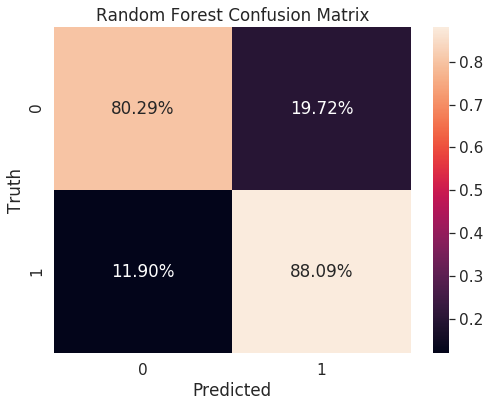

In [58]:
model_df_cm = pd.DataFrame(CM, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Random Forest Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/np.sum(model_df_cm, axis=1), annot=True, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figures/' + 'Random_Forest' + '_confusion_matrix_normalized.png', dpi=300)
plt.show()

#### Logistic Regression Model

In [ ]:
C = [1e-1, 1e-2]
solver = ['liblinear']
max_iter = [10000]
multi_class = ['ovr']
n_jobs = [-1]
param_grid = dict(C=C, solver=solver, max_iter=max_iter, multi_class=multi_class, n_jobs=n_jobs)

In [26]:
# logistic regression
logreg = LogisticRegression()
logreg_cv = GridSearchCV(estimator=logreg, param_grid=dict(param_grid), scoring='accuracy', cv=3, return_train_score=True)
logreg_cv.fit(X_train, y_train)
# RandomFC.fit(X_test, y_test)
print(logreg_cv.best_params_)
logreg_cv.cv_results_

/home/fkirmani/anaconda3/envs/astro/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


{'C': 0.1, 'max_iter': 10000, 'multi_class': 'ovr', 'n_jobs': -1, 'solver': 'liblinear'}


{'mean_fit_time': array([23.45552349, 18.47542556]),
 'std_fit_time': array([1.71424362, 0.30686833]),
 'mean_score_time': array([0.1983002, 0.2305065]),
 'std_score_time': array([0.05486582, 0.00768246]),
 'param_C': masked_array(data=[0.1, 0.01],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[10000, 10000],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_multi_class': masked_array(data=['ovr', 'ovr'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_jobs': masked_array(data=[-1, -1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['liblinear', 'liblinear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1,
   'max_iter': 10000,
   'multi_class': 'ovr',
   'n_jobs': -1,
   'solver':

In [27]:
# logreg = LogisticRegression(C=0.01)
# logreg.fit(X_train, y_train)

In [59]:
# Print accuracy
print('Accuracy of Logreg classifier on training set: {:.2f}'.format(logreg_cv.score(X_train, y_train)))
print('Accuracy of Logreg classifier on test set: {:.2f}'.format(logreg_cv.score(X_test, y_test)))
CM = confusion_matrix(y_test, logreg_cv.predict(X_test))
print(CM)
CR = classification_report(y_test, logreg_cv.predict(X_test))
print(CR)

Accuracy of Logreg classifier on training set: 0.90
Accuracy of Logreg classifier on test set: 0.83
[[4995 1257]
 [ 912 5336]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      6252
           1       0.81      0.85      0.83      6248

    accuracy                           0.83     12500
   macro avg       0.83      0.83      0.83     12500
weighted avg       0.83      0.83      0.83     12500



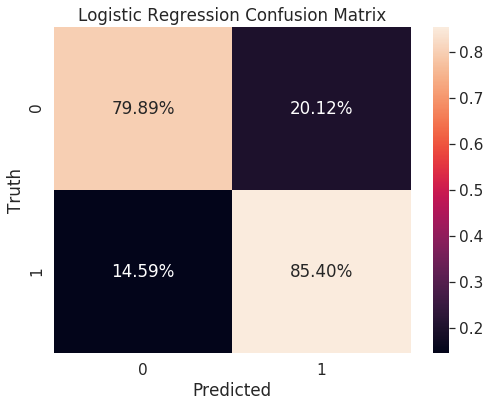

In [60]:
model_df_cm = pd.DataFrame(CM, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Logistic Regression Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/np.sum(model_df_cm, axis=1), annot=True, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figures/' + 'Logistic_Regression' + '_confusion_matrix_normalized.png', dpi=300)
plt.show()

#### XGBoost Classification Model

In [30]:
# max_depth = [3, 5]
# learning_rate = [1e-3, 1e-2, 1e-1]
# n_estimators = [300, 500]
# # silent = ['True']
# objective = ['binary:logistic']
# booster = ['gbtree']
# n_jobs = [-1]
# nthread = [4]
# gamma = [50, 75]
# min_child_weight = [3]
# max_delta_step = [5]
# subsample = [0.5]
# colsample_bytree = [1]
# colsample_bylevel = [1]
# reg_alpha = [1]
# reg_lambda = [1]
# scale_pos_weight = [1]
# base_score = [0.25]
# random_state = [7777]
# param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
#                   objective=objective, booster=booster, n_jobs=n_jobs, nthread=nthread, gamma=gamma,
#                   min_child_weight=min_child_weight, max_delta_step=max_delta_step, subsample=subsample,
#                   colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel, reg_alpha=reg_alpha,
#                   reg_lambda=reg_lambda, scale_pos_weight=scale_pos_weight, base_score=base_score,
#                   random_state=random_state)

In [31]:
# # # train model
# selection_model = xgb.XGBClassifier()
# XGBC = GridSearchCV(estimator=selection_model, param_grid=param_grid, scoring='recall', cv=3, return_train_score=True)
# XGBC.fit(X_train, y_train)
# # CV_rfc.fit(X_testXG1, y_testXG1)
# print(XGBC.best_params_)
# XGBC.cv_results_

In [43]:
XGBC = xgb.XGBClassifier(n_estimators=250, colsample_bytree=1, 
                         min_child_weight=5, gamma=60, 
                         learning_rate=0.03, n_jobs=-1)
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=60, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# Print accuracy
print('Accuracy of xgboost classifier on training set: {:.2f}'.format(XGBC.score(X_train, y_train)))
print('Accuracy of xgboost classifier on test set: {:.2f}'.format(XGBC.score(X_test, y_test)))
CM = confusion_matrix(y_test, XGBC.predict(X_test))
print(CM)
CR = classification_report(y_test, XGBC.predict(X_test))
print(CR)

Accuracy of xgboost classifier on training set: 0.83
Accuracy of xgboost classifier on test set: 0.82
[[4834 1418]
 [ 833 5415]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6252
           1       0.79      0.87      0.83      6248

    accuracy                           0.82     12500
   macro avg       0.82      0.82      0.82     12500
weighted avg       0.82      0.82      0.82     12500



In [ ]:
model_df_cm = pd.DataFrame(CM, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('XGBoost Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/np.sum(model_df_cm, axis=1), annot=True, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figures/' + 'XGBoost' + '_confusion_matrix_normalized.png', dpi=300)
plt.show()